In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm

In [2]:
#Load the data and see the head of dataframe
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Check data types
bank_data.shape, bank_data.dtypes

((5000, 14),
 ID                      int64
 Age                     int64
 Experience              int64
 Income                  int64
 ZIP Code                int64
 Family                  int64
 CCAvg                 float64
 Education               int64
 Mortgage                int64
 Personal Loan           int64
 Securities Account      int64
 CD Account              int64
 Online                  int64
 CreditCard              int64
 dtype: object)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#Statistical Summary
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# The 5 point summary says we have rows with experience as negative value which is not correct, lets find out the 
# count of such rows.
len(bank_data[bank_data['Experience']<0])

52

In [7]:
#Check for Null values
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# There are 52 rows with experience as negative value, lets impute those rows with median value of Experience column
bank_data['Experience'] = np.where(bank_data['Experience']<0, bank_data['Experience'].median(), bank_data['Experience'])

In [9]:
# Check if we have 'Experience' value as negative after the imputing
len(bank_data[bank_data['Experience']<0])

0

In [10]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# The minimum value of a Zip Code has only 4 digits, lets fix such values in the dataframe

# Exploratory Data Analysis

In [11]:
# Find the unique values of each column
bank_data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
#We have 5000 rows of data and the column 'ID' has 5000 unique values which mean this column is not going to effect
#the model hance dropping it.
bank_data.drop('ID', axis=1, inplace=True)
bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
#Find all the zip codes that is less than 5 digits
zip_codes_less_than_5_digits = bank_data[bank_data['ZIP Code'].astype(str).str.len()<5]
bank_data.iloc[zip_codes_less_than_5_digits.index]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


In [14]:
#We have only one zip code that is 4 digits, lets add 0 and the end to make it a valid zip code
bank_data.loc[zip_codes_less_than_5_digits.index,'ZIP Code'] = int(str(zip_codes_less_than_5_digits['ZIP Code'].iloc[0])+'0')
bank_data.iloc[zip_codes_less_than_5_digits.index]['ZIP Code']

384    93070
Name: ZIP Code, dtype: int64

In [15]:
#Map all the zip codes to state, in this case all zip codes are belong to One single state and if we map it to everything
# to one state we might loose some information, hence mapping it to county level.
# I have used 'uszipcode' library to map the zip codes to county.
# Install 'uszipcode' library
import sys

!{sys.executable} -m pip install uszipcode

In [16]:
from uszipcode import SearchEngine
search = SearchEngine()
def map_zip_to_county(zip_code):
    zip_info = search.by_zipcode(zip_code)
    return zip_info.county
for idx, zip_code in enumerate(bank_data['ZIP Code']):
    county = map_zip_to_county(zip_code)
    bank_data.loc[idx, 'County'] = county

bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [17]:
#Verify if we have any null values after zip code to county mapping
bank_data.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
County                34
dtype: int64

In [18]:
# We have 34 zip codes that the library couldn't find, which means they are not valid zip code values.
# Lets impute them with the 'County' column mode values
bank_data['County'].fillna(value=bank_data['County'].mode().values[0], inplace=True)
bank_data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
County                0
dtype: int64

In [19]:
# Since we mapped all our zip codes to county, lets drop the 'ZIP Code' column
bank_data.drop('ZIP Code', axis=1, inplace=True)
bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [20]:
# Convert the data type of County and Education columns as category
bank_data['County'] = bank_data['County'].astype('category')
bank_data['Education'] = bank_data['Education'].astype('category')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   float64 
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   int64   
 8   Securities Account  5000 non-null   int64   
 9   CD Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  County              5000 non-null   category
dtypes: category(2), float64(2), int64(9)
memory usage: 441.2 KB


In [21]:
#get the list of categorical columns
cols = bank_data.columns
numerical_columns = bank_data._get_numeric_data().columns
categorical_columns = list(set(cols)- set(numerical_columns))
categorical_columns

['County', 'Education']

In [22]:
# Find the number of people that have NO mortgage
len(bank_data[bank_data['Mortgage']==0])

3462

In [23]:
# Find the number of people with zero credit card spending per month
len(bank_data[bank_data['CCAvg']==0])

106

In [24]:
# Find the number of people that uses online
bank_data['Online'].sum()

2984

In [25]:
# Value counts of categorical columns
for col in categorical_columns:
    print('Value Counts of the column: {}'.format(col))
    print(bank_data[col].value_counts())

Value Counts of the column: County
Los Angeles County        1129
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuol

In [26]:
bank_data.groupby('Personal Loan').mean()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,20.378982,66.237389,2.373451,1.729009,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,100.845833,0.125000,0.291667,0.606250,0.297917


<ol>
    <li> The average income of customers who accepted the personal loan is higher than the average income of customers who didn't accept the personal loan</li>
    <li> The average credit card spending is much higher for the customers who accepted the personal when compared to the customer who did not accept the personal loan </li>
</ol>

In [27]:
pd.crosstab(bank_data['Securities Account'], bank_data['Personal Loan'], margins=True)

Personal Loan,0,1,All
Securities Account,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


In [28]:
pd.crosstab(bank_data['CD Account'], bank_data['Personal Loan'], margins=True)

Personal Loan,0,1,All
CD Account,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


In [29]:
pd.crosstab(bank_data['CreditCard'], bank_data['Personal Loan'], margins=True)

Personal Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


# Univariate Analysis

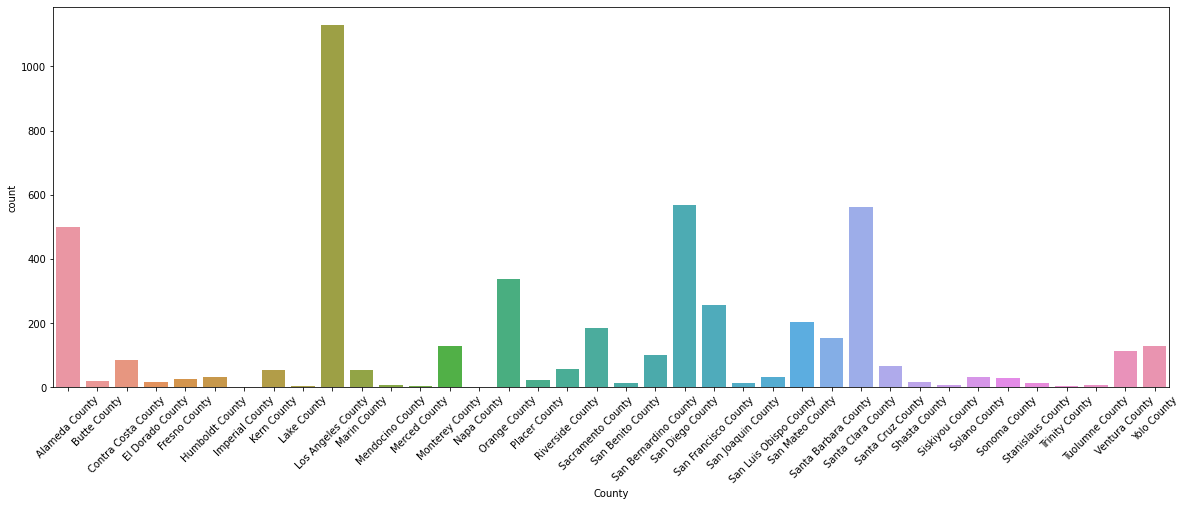

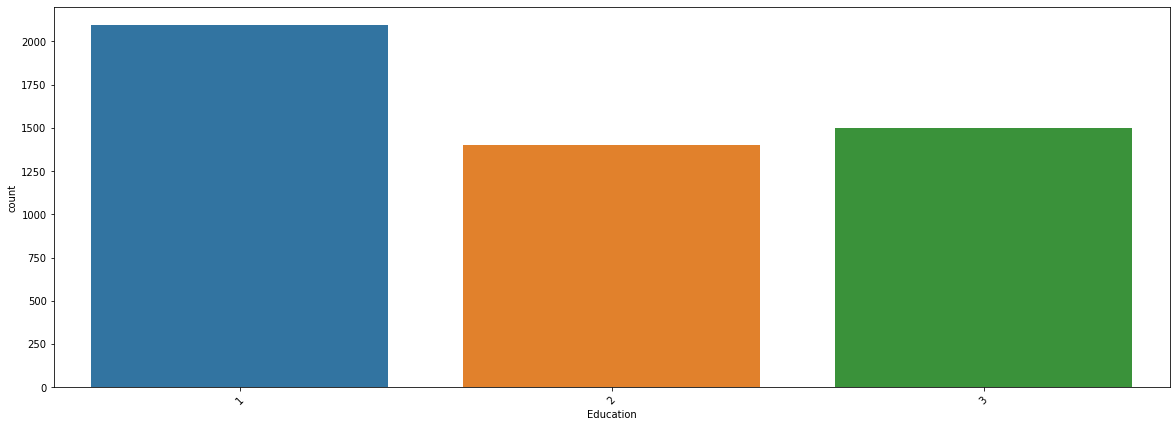

In [30]:
for col in categorical_columns:  
    plt.figure(figsize=(20,7))
    sns.countplot(bank_data[col])
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

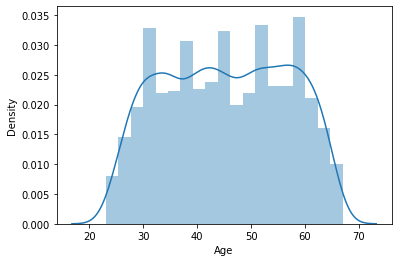

In [31]:
sns.distplot(bank_data['Age'])

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

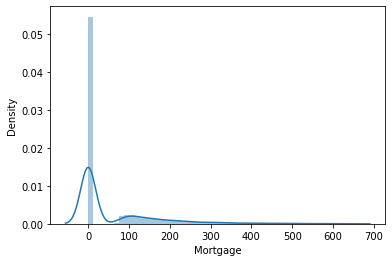

In [32]:
sns.distplot(bank_data['Mortgage'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

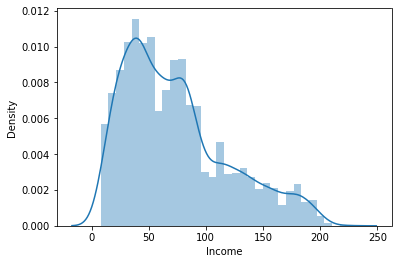

In [33]:
sns.distplot(bank_data['Income'])

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

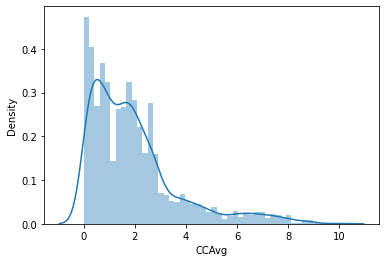

In [34]:
sns.distplot(bank_data['CCAvg'])

# Bivariate Analysis

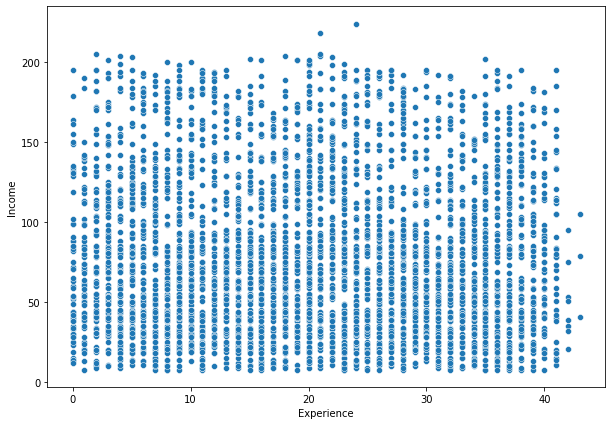

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Experience'], bank_data['Income'])
plt.show()

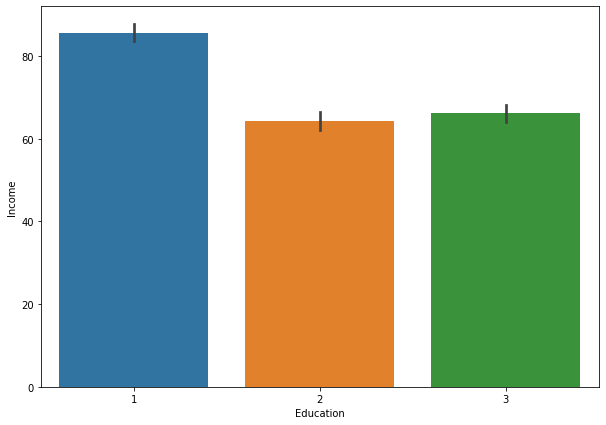

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(bank_data['Education'], bank_data['Income'])
plt.show()

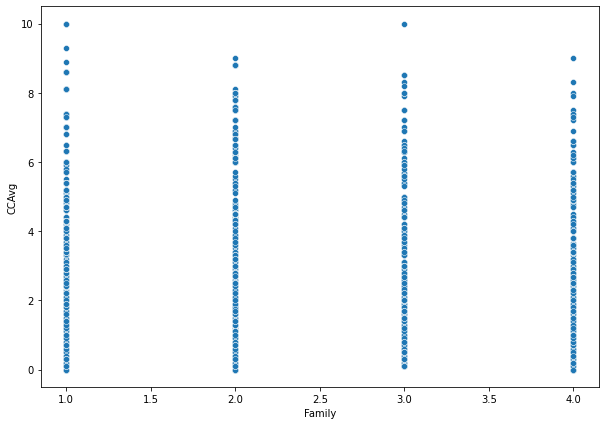

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Family'], bank_data['CCAvg'])
plt.show()

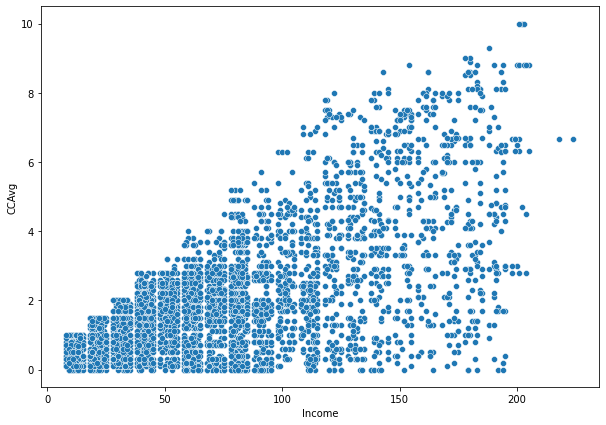

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Income'], bank_data['CCAvg'])
plt.show()

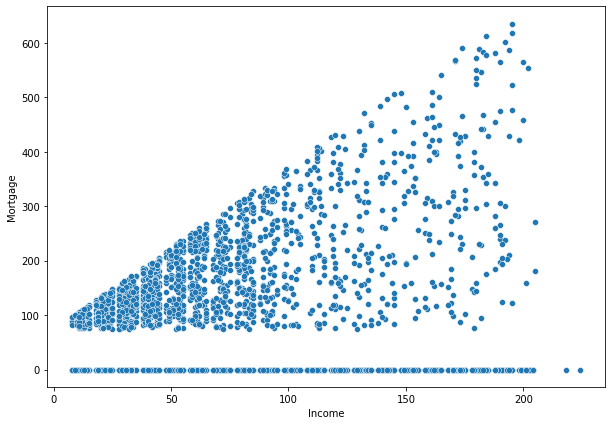

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Income'], bank_data['Mortgage'])
plt.show()

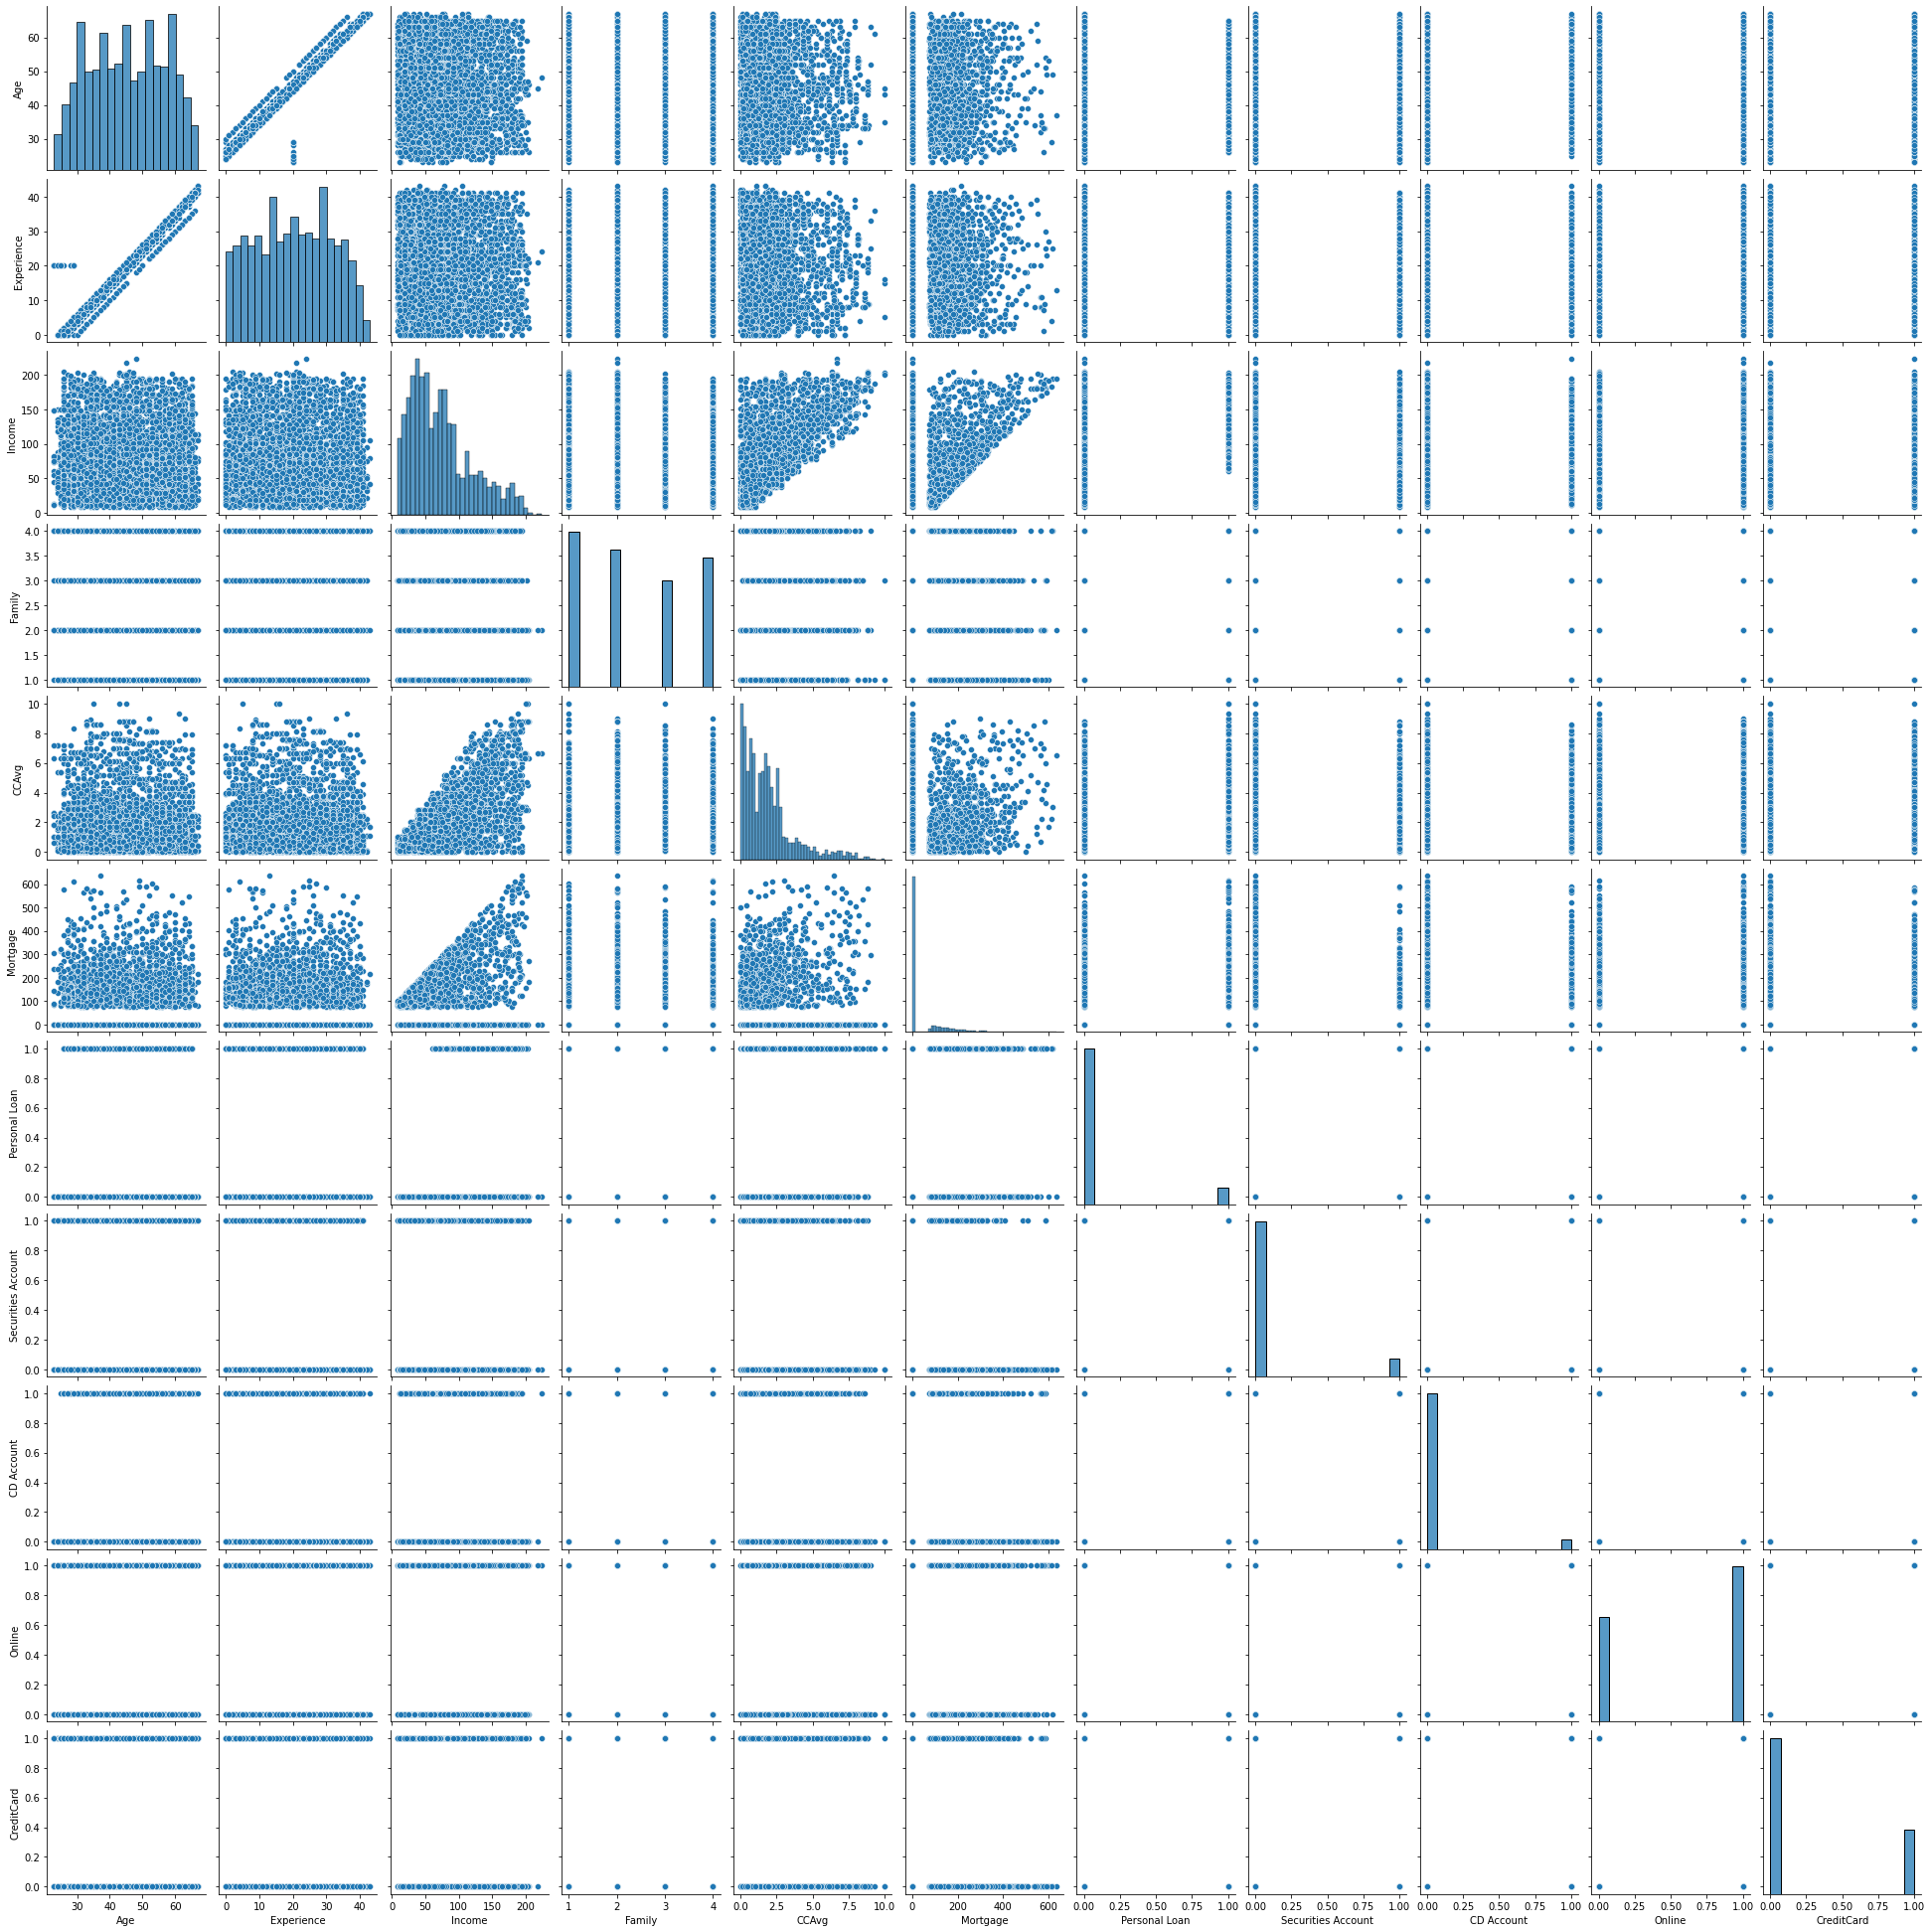

In [40]:
sns.pairplot(bank_data)

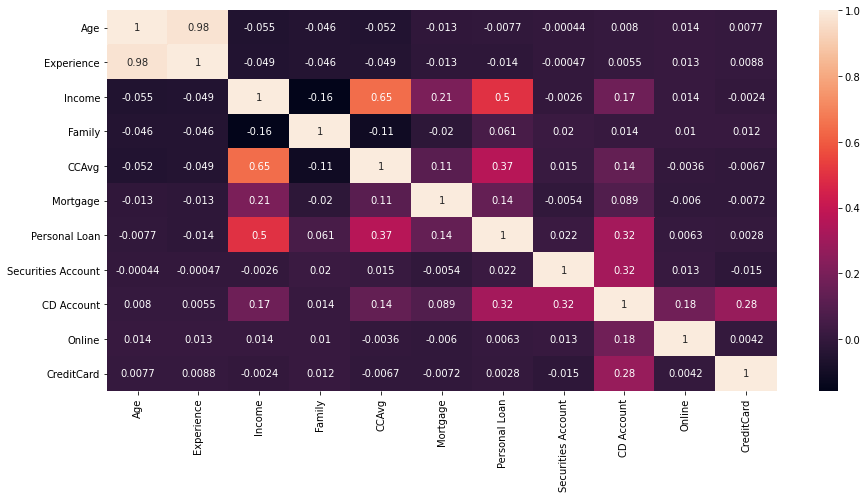

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(bank_data.corr(), annot=True)
plt.show()

`There doesn't seems to be any strong correlation between the features except between age and experience and  a slight correlation between CCAVG and Income`

In [42]:
#dropping 'Age' column
bank_data.drop('Age', axis=1, inplace=True)

In [43]:
noof_personal_loan_subscriptions = len(bank_data[bank_data['Personal Loan']==1])
noof_non_personal_loan_subscriptions = len(bank_data[bank_data['Personal Loan']==0])
print('Percentage of personal loan subscriptions {}'.format((noof_personal_loan_subscriptions)/len(bank_data['Personal Loan'])*100))
print('Percentage of non personal loan subscriptions {}'.format((noof_non_personal_loan_subscriptions)/len(bank_data['Personal Loan'])*100))

Percentage of personal loan subscriptions 9.6
Percentage of non personal loan subscriptions 90.4


# Make the data Model ready 

In [44]:
#Seperate features and target fields
X = bank_data.drop(['Personal Loan'], axis=1)
y = bank_data['Personal Loan']

In [45]:
#Convert categorical columns to numerical using pd.get_dummies
X = pd.get_dummies(data=X, drop_first=True)
X.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_2', 'Education_3', 'County_Butte County',
       'County_Contra Costa County', 'County_El Dorado County',
       'County_Fresno County', 'County_Humboldt County',
       'County_Imperial County', 'County_Kern County', 'County_Lake County',
       'County_Los Angeles County', 'County_Marin County',
       'County_Mendocino County', 'County_Merced County',
       'County_Monterey County', 'County_Napa County', 'County_Orange County',
       'County_Placer County', 'County_Riverside County',
       'County_Sacramento County', 'County_San Benito County',
       'County_San Bernardino County', 'County_San Diego County',
       'County_San Francisco County', 'County_San Joaquin County',
       'County_San Luis Obispo County', 'County_San Mateo County',
       'County_Santa Barbara County', 'County_Santa Clara County',
       'County_Santa Cruz Cou

# Split Data

In [46]:
#Split the data into training vs test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

y_train_personal_loan_subscriptions = len(y_train[y_train==1])
y_train_non_personal_loan_subscriptions = len(y_train[y_train==0])

y_test_personal_loan_subscriptions = len(y_test[y_test==1])
y_test_non_personal_loan_subscriptions = len(y_test[y_test==0])

print('Percentage of y_train personal loan subscriptions {}'.format((y_train_personal_loan_subscriptions)/len(y_train)*100))
print('Percentage of y_train non personal loan subscriptions {}'.format((y_train_non_personal_loan_subscriptions)/len(y_train)*100))

print('Percentage of y_test personal loan subscriptions {}'.format((y_test_personal_loan_subscriptions)/len(y_test)*100))
print('Percentage of y_test non personal loan subscriptions {}'.format((y_test_non_personal_loan_subscriptions)/len(y_test)*100))

Percentage of y_train personal loan subscriptions 9.457142857142857
Percentage of y_train non personal loan subscriptions 90.54285714285714
Percentage of y_test personal loan subscriptions 9.933333333333334
Percentage of y_test non personal loan subscriptions 90.06666666666666


In [47]:
#Initialize the LogisticModel and trian using the train data
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [48]:
#Predict the output for test dataset using the trained model
y_predict = logit_reg.predict(X_test)
len(y_predict[y_predict==0])/len(y_predict), len(y_predict[y_predict==1])/len(y_predict)

(0.938, 0.062)

In [51]:
#Get the confusion matrix using the sklearn package
confusion_matrix = cm(y_test, y_predict, labels=[1,0])
confusion_matrix

array([[  84,   65],
       [   9, 1342]])

`Above is the confusion matrix which is dervived from y_actual and y_predict. But we are not sure what are True Positives, True Negatives, False Positives and False Negative values. Lets find out those by comparing actual vs predict values`

In [215]:
#Define function which will return TP, FP, FN and TN for a given y_test and y_predict
def calculate_conf_matrix_values(y_test, y_predict):
    tp, fp, fn, tn = 0,0,0,0
    y_test_array = y_test.to_numpy()
    for i in range(len(y_test)):
        if (y_test.iloc[i] == 1 and y_predict[i] == 1):
            tp+=1
        elif (y_test.iloc[i] == 0 and y_predict[i] == 1):
            fp+=1
        elif (y_test.iloc[i] == 1 and y_predict[i] == 0):
            fn+=1
        else:
            tn+=1
    return tp, fp, fn, tn

In [216]:
tp, fp, fn, tn = calculate_conf_matrix_values(y_test, y_predict)
print('TP: {}'.format(tp)+' FP: {}'.format(fp)+ ' FN: {}'.format(fn)+ ' TN: {}'.format(tn))

TP: 84 FP: 9 FN: 65 TN: 1342


`The confusion matrix from sklearn package did not arrange in [[TP, FP],[FN,TN]] format, so lets rearrange the given matrix in that format which will be useful in calculating the performance metrics like Accuracy, Precession.. etc`

In [217]:
def rearrange_conf_matrix(con_matrix):
    temp = con_matrix.copy()
    for i in range(len(con_matrix)):
        for j in range(len(con_matrix)):
            if i==j:
                if i==0:
                    con_matrix[i][j] = temp[1][1]
                else:
                    con_matrix[i][j] = temp[0][0]
    return con_matrix
confusion_matrix = rearrange_conf_matrix(confusion_matrix)
confusion_matrix

array([[  84,    9],
       [  65, 1342]])

# We have [84 + 1342] correct predictions and [9 + 65] incorrect predictions using the sklearn default threshold of 0.5

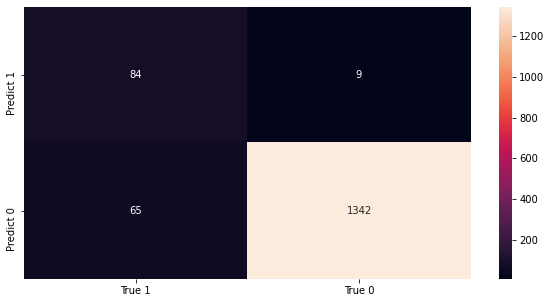

In [218]:
#lets plot the heatmap of rearranged confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['True 1', 'True 0'],index=['Predict 1', 'Predict 0'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g')
plt.show()

<h3>Lets calculate Accuracy, recall, precession and f1-scores using formulas (without using the library)</h3>

In [219]:
def accuracy(tp,fp,fn,tn):
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    return accuracy

print('Accuracy of the model: {}'.format(accuracy(tp,fp,fn,tn)))

Accuracy of the model: 0.9506666666666667


In [220]:
def recall(tp, fn): 
    if tp == 0 and fn == 0:
        return 0
    recall = tp/(tp+fn)
    return recall

print('Recall/Sensitivity of the model: {}'.format(recall(tp,fn)))

Recall/Sensitivity of the model: 0.5637583892617449


In [221]:
def precession(tp,fp):  
    if tp == 0 and fp == 0:
        return 0
    precession = tp/(tp+fp)
    return precession

print('Precession of the model: {}'.format(precession(tp,fp)))

Precession of the model: 0.9032258064516129


In [222]:
def f1score(tp,fp,fn):
    p = precession(tp,fp)
    r = recall(tp,fn)
    if p == 0 and r == 0:
        return 0
    f1score = (2 * p * r) / (p + r)
    return f1score

print('F1 Score of the model: {}'.format(f1score(tp,fp,fn)))

F1 Score of the model: 0.6942148760330578


<h3>Lets calculate Accuracy, recall, precession, f1-scores  and auc_score using the library</h3>

In [223]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_score = roc_auc_score(y_test, y_predict)
print('The model roc auc score: {}'.format(auc_score))

The model roc auc score: 0.778548328605706


In [224]:
#Accuracy,Recall and Precession using sklearn library
from sklearn.metrics import precision_recall_curve, accuracy_score
prec, recal, threshold = precision_recall_curve(y_test, y_predict)
print('Accuracy of the model: {}'.format(accuracy_score(y_test, y_predict)))
print('Recall/Sensitivity of the model: {}'.format(recal))
print('Precession of the model: {}'.format(prec))
print('Thresholds of the model: {}'.format(threshold))

Accuracy of the model: 0.9506666666666667
Recall/Sensitivity of the model: [1.         0.56375839 0.        ]
Precession of the model: [0.09933333 0.90322581 1.        ]
Thresholds of the model: [0 1]


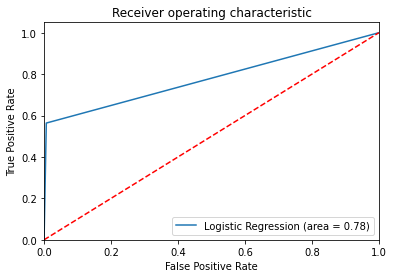

In [225]:
#Lets plot the ROC graph
model_roc_auc = roc_auc_score(y_test, y_predict)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
thresholds, fpr, tpr
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

`From the above ROC graph, the area under the curve is 0.78 which is good`

# Let's find out if the default threshold is good for our goal (To devise campaigns with better target marketing to increase the success ratio with a minimal budget) by calculating the performance metrics at the different thresholds 

In [227]:
#Finding the best threshold
def calculate_fpr_and_tpr(tp,fp,fn,tn):
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    return fpr, tpr

def find_best_threshold(X_test, predict_prob_df):
    thresholds = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99]
    fpr, tpr,  model_roc_auc=[],[], 0
    for t in thresholds:
        y_predict_t = predict_prob_df.applymap(lambda x: 1 if x>t else 0)
        print('Model metrics for the threshold: {}'.format(t))
        tp,fp,fn,tn = calculate_conf_matrix_values(y_test, y_predict_t.iloc[:, 1].to_numpy())
        conf_matrix = cm(y_test, y_predict_t.iloc[:, 1])
        conf_matrix = rearrange_conf_matrix(conf_matrix)
        print('Confusion Matrix: ',conf_matrix)
        print('Accuracy: {}'.format(accuracy(tp,fp,fn,tn)))
        print('Recall: {}'.format(recall(tp,fn)))
        print('Precession: {}'.format(precession(tp,fp)))
        print('F1 Score: {}'.format(f1score(tp,fp,fn)))
        auc_score = roc_auc_score(y_test, y_predict_t.iloc[:, 1])
        print('The model roc auc score: {}'.format(auc_score))
        false_positive_rate, true_positive_rate = calculate_fpr_and_tpr(tp,fp,fn,tn)
        model_roc_auc += (false_positive_rate * true_positive_rate)
        fpr.append(false_positive_rate)
        tpr.append(true_positive_rate)
    return fpr, tpr, t, model_roc_auc
predict_prob_df = pd.DataFrame(logit_reg.predict_proba(X_test))
fpr, tpr, threshold, model_roc_auc = find_best_threshold(X_test, predict_prob_df)

Model metrics for the threshold: 0.05
Confusion Matrix:  [[ 144  272]
 [   5 1079]]
Accuracy: 0.8153333333333334
Recall: 0.9664429530201343
Precession: 0.34615384615384615
F1 Score: 0.5097345132743363
The model roc auc score: 0.8825553033050338
Model metrics for the threshold: 0.1
Confusion Matrix:  [[ 134  153]
 [  15 1198]]
Accuracy: 0.888
Recall: 0.8993288590604027
Precession: 0.46689895470383275
F1 Score: 0.6146788990825688
The model roc auc score: 0.8930397071023701
Model metrics for the threshold: 0.15
Confusion Matrix:  [[ 123   99]
 [  26 1252]]
Accuracy: 0.9166666666666666
Recall: 0.825503355704698
Precession: 0.5540540540540541
F1 Score: 0.6630727762803236
The model roc auc score: 0.876112151575517
Model metrics for the threshold: 0.2
Confusion Matrix:  [[ 118   69]
 [  31 1282]]
Accuracy: 0.9333333333333333
Recall: 0.7919463087248322
Precession: 0.6310160427807486
F1 Score: 0.7023809523809524
The model roc auc score: 0.8704365148361393
Model metrics for the threshold: 0.25
C

# As per the goal, we need to increase the success rate with minimal budget, which implies we need to reduce the false positives. If we have higher number of false positives we would be spending lot of money targeting campaign for those customers but they end up not getting the loan. So the money we spent on campaigning against those customers is going to be waste. On the other hand, if we have higher number of False Negatives, we would be loosing their business. Hence the default threshold 0.5 gives a good balance of FP and FN for the goal we intended to 

In [228]:
#Display the co-efficients of logfunction for each column in a dataframe
coefficient_df = pd.DataFrame(logit_reg.coef_, columns=X_train.columns)
coefficient_df['interceptor'] = logit_reg.intercept_
coefficient_df.transpose()

,0
Experience,-0.009492
Income,0.044250
Family,0.405826
CCAvg,0.150567
Mortgage,0.000712
Securities Account,-0.916127
CD Account,3.069811
Online,-0.657592
CreditCard,-0.977385
Education_2,2.602246


In [229]:
# Display where the predict class is not equal to the observed class
diff_of_prediction_vs_actual = (y_predict - y_test)
indexes_of_incorrect_predictions = diff_of_prediction_vs_actual[diff_of_prediction_vs_actual != 0].index
print('Test data where the prediction class is not equal to observed class')
X_test[X_test.index.isin(indexes_of_incorrect_predictions)]

Test data where the prediction class is not equal to observed class


,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,...,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
932,27.0,112,3,1.8,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3988,35.0,85,1,3.4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3271,27.0,93,4,4.1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
349,2.0,60,2,3.0,132,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
927,40.0,95,3,3.7,138,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,9.0,113,3,0.8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
813,25.0,130,1,1.1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3766,35.0,108,4,3.8,304,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
421,3.0,115,4,3.1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Business Conclusion:

Business should consider the following features in targetting their campaign for hiher success rate with minimal budget:

<ul>
    <li><b><u>Securities Account</u></b> - From the model co-efficient, the security account has negative impact on the customer taking a personal loan. It might be a good idea not to run campaign against those customers</li>
    <li><b><u>CD Account</u></b> - From the model co-efficient, the CD Account has very strong positive impact on the customer taking a personal loan. Busines should target those customers</li>
    <li><b><u>CreditCard</u></b> - Having a CreditCard account has negative impact on customer taking a personal loan. Busines should consider this while targeting customers with credit card</li>
    <li><b><u>Education</u></b>	- Education has positive impact on customer taking a personal loan. Busines should consider targeting customers with Education of Graduate and Advanced/Professional</li>
    <li><b><u>Region/Zip Code</u></b> - Business should spend money in campaigning for the customers who lives in Riverside and Kern counties more than who lives in counties San Bernardino  and San Mateo as these counties have negative impact on customer taking a personla loan.</li>

In [230]:
customers_who_accepts = y_predict[y_predict==1]
print('The percentage of customer that will accept the personal loan predicted by the model: {}'.format((len(customers_who_accepts)/len(y_predict)*100)))

The percentage of customer that will accept the personal loan predicted by the model: 6.2


# The original data has more number of 0's in the target column when compared to 1's, this might result biased prediction. To over come that, lets balance the outcome variable using over sampling techniques such as SMOTE (Synthetic Minority Over Sampling Technique)

# Using SMOTE

In [231]:
#Using Over sampling techniques
from imblearn.over_sampling import SMOTE

over_sampling = SMOTE(random_state=1)
X_train_columns = X_train.columns

print('y_train sample size before over sampling {}'.format(len(y_train)))
print("\n")
os_data_X, os_data_y = over_sampling.fit_sample(X_train, y_train)

os_data_y_subscriptions = len(os_data_y[os_data_y==1])
os_data_y_non_subscriptions = len(os_data_y[os_data_y==0])

print('X_train sample size after over sampling {}'.format(len(os_data_X)))
print('y_train sample size after over sampling {}'.format(len(os_data_y)))
print("\n")
print('y train Percentage of subscriptions post SMOTE {}'.format((os_data_y_subscriptions)/len(os_data_y)*100))
print('y train Percentage of non subscriptions post SMOTE {}'.format((os_data_y_non_subscriptions)/len(os_data_y)*100))

y_train sample size before over sampling 3500


X_train sample size after over sampling 6338
y_train sample size after over sampling 6338


y train Percentage of subscriptions post SMOTE 50.0
y train Percentage of non subscriptions post SMOTE 50.0


In [232]:
logit_reg_with_smote = LogisticRegression(solver='liblinear')
logit_reg_with_smote.fit(os_data_X, os_data_y)

LogisticRegression(solver='liblinear')

In [233]:
y_predict = logit_reg_with_smote.predict(X_test)

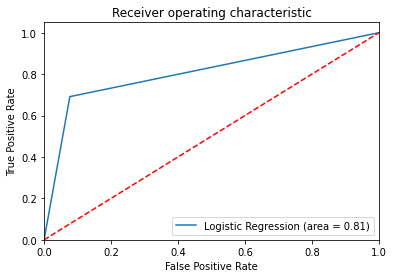

In [238]:
#Lets plot the ROC graph
model_roc_auc = roc_auc_score(y_test, y_predict)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
thresholds, fpr, tpr
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

In [239]:
customers_who_accepts = y_predict[y_predict==1]
print('The percentage of customer that will accept the personal loan predicted by the model: {}%'.format((len(customers_who_accepts)/len(y_predict)*100)))

The percentage of customer that will accept the personal loan predicted by the model: 13.8%
